In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV


In [226]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')

In [227]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


This is the dataset of medical insurance. containing 1338 rows and 7 columns

In [228]:
df.shape

(1338, 7)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


This shows the dtype containing 2(float64),2(int64) and 3(object).
There is no null value.

In [230]:
df.sample(15)

,age,sex,bmi,children,smoker,region,charges
687,40,male,41.690,0,no,southeast,5438.74910
333,56,female,28.785,0,no,northeast,11658.37915
594,41,male,40.260,0,no,southeast,5709.16440
346,33,male,35.750,2,no,southeast,4889.99950
1117,25,male,33.330,2,yes,southeast,36124.57370
965,35,male,27.100,1,no,southwest,4746.34400
866,18,male,37.290,0,no,southeast,1141.44510
50,18,female,35.625,0,no,northeast,2211.13075
1051,64,male,26.410,0,no,northeast,14394.55790
711,50,female,23.540,2,no,southeast,10107.22060


This are the randam selection of rows and columns from the dataset

In [231]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


first 10 rows of dataset

In [232]:
df['charges'].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

This is the total value count of the charges row

In [233]:
#checking values count of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

This is the value count of each column with dtype.

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


this shows the indexing typen, datatype, and no nullvalues.

In [235]:
df.isnull().sum().sum()

0

there is 0 nullvalue

<Axes: >

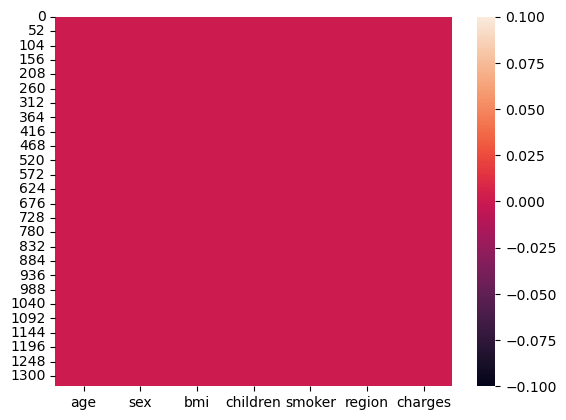

In [236]:
sns.heatmap(df.isnull())

heatmap shows that there is no nullvalue in the dataset

In [237]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1. This statistical data shows the that there are no missing values as the count of columns are same.
2. mean is greater than median(50%).
3. There is huge difference between the 75% and max which means there are outliers present in the dataset.

In [238]:
#converting caterogical data into numerical data
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0,'northeast':1,'southeast':2,'southwest':3})

Here we have converted all the caterogical data into numerical data so that working with the data will be easy

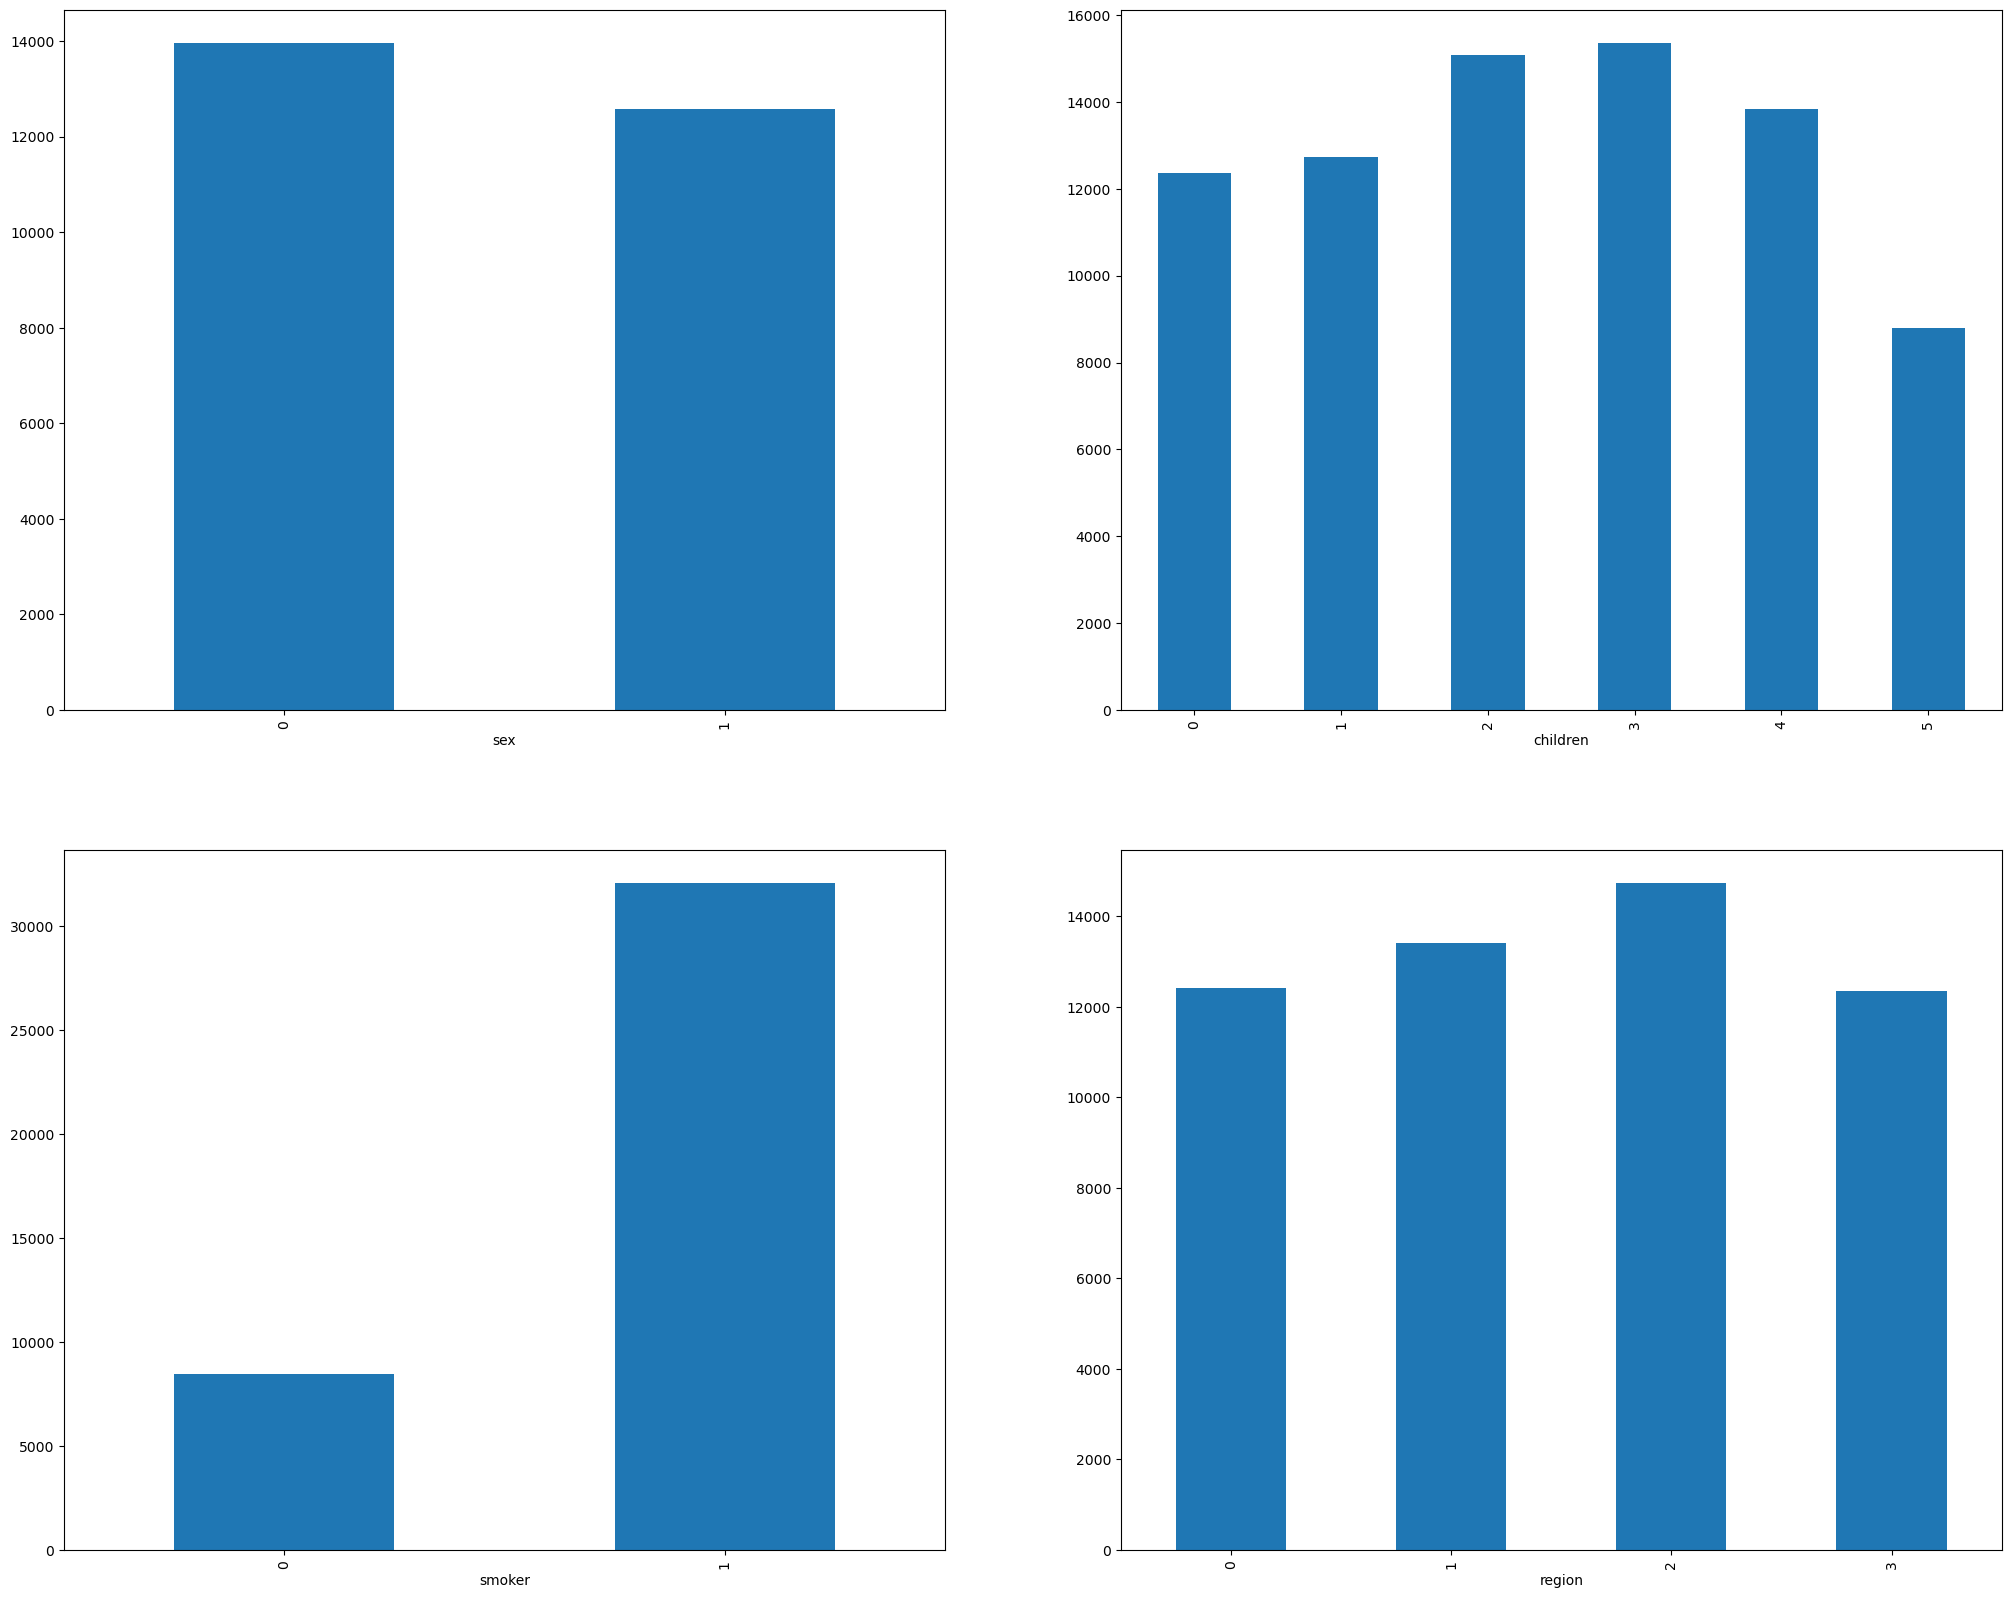

In [239]:
features=['sex','children','smoker','region']
plt.subplots(figsize=(25,20))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    df.groupby(col).mean()['charges'].plot.bar()
plt.show()

This is the bargraph to show the features of the columns in comparison with the charges column.
1. we can see that male charges is more than the female charges but there is not much difference.
2. The smokers charges are high than the non-smokers.


<Axes: >

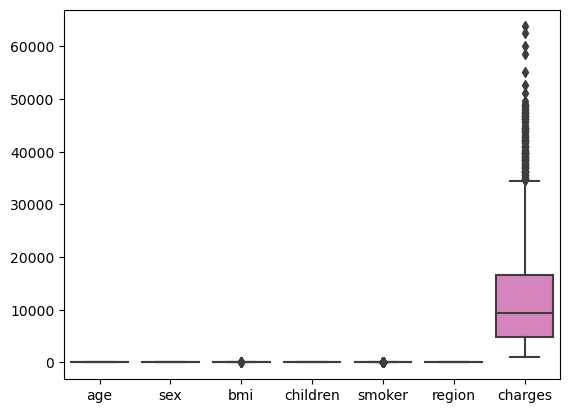

In [240]:
df.drop_duplicates(inplace=True)
sns.boxplot(df)

dropping any duplicated values present in the data

In [241]:
df.duplicated().sum()

0

All duplicate values has been removed. There are 0 duplicate.

In [242]:
#checking the correlation
dfc=df.corr()

In [243]:
dfc

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.109344,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.046397,-0.017848,-0.076596,-0.008998,-0.058044
bmi,0.109344,-0.046397,1.000000,0.012755,0.003746,0.156784,0.198401
children,0.041536,-0.017848,0.012755,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003746,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156784,-0.002842,0.012736,1.000000,0.010767
charges,0.298308,-0.058044,0.198401,0.067389,0.787234,0.010767,1.000000


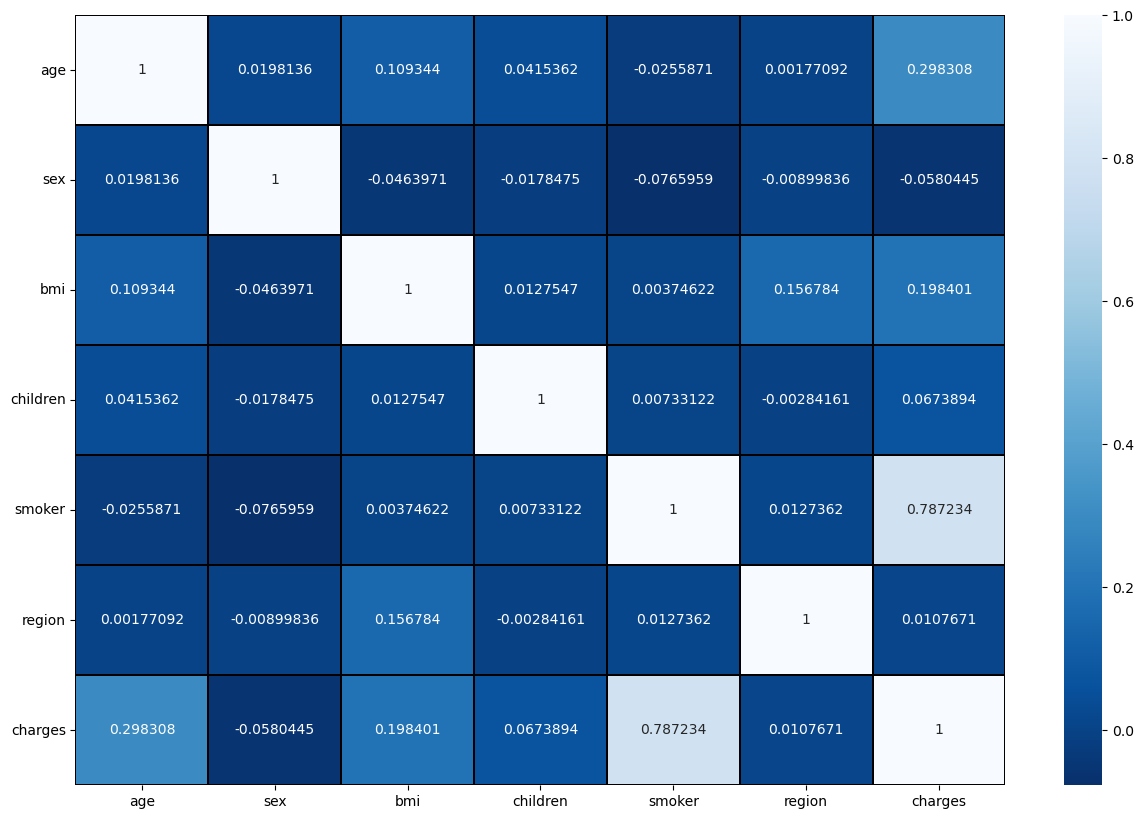

In [244]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidths=0.1,fmt='1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0);
plt.show()

This is the correlation chart, as we can see the smoker and sex are highly negatively correlated.
where as smoker and charges are highly positively correlated.
It is better to drop the sex column.

In [245]:
#to drop sex column
df.drop('sex',axis=1,inplace=True)

In [246]:
df

,age,bmi,children,smoker,region,charges
0,19,27.900,0,1,3,16884.92400
1,18,33.770,1,0,2,1725.55230
2,28,33.000,3,0,2,4449.46200
3,33,22.705,0,0,0,21984.47061
4,32,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,30.970,3,0,0,10600.54830
1334,18,31.920,0,0,1,2205.98080
1335,18,36.850,0,0,2,1629.83350
1336,21,25.800,0,0,3,2007.94500


Here we can see that sex column has been dropped.

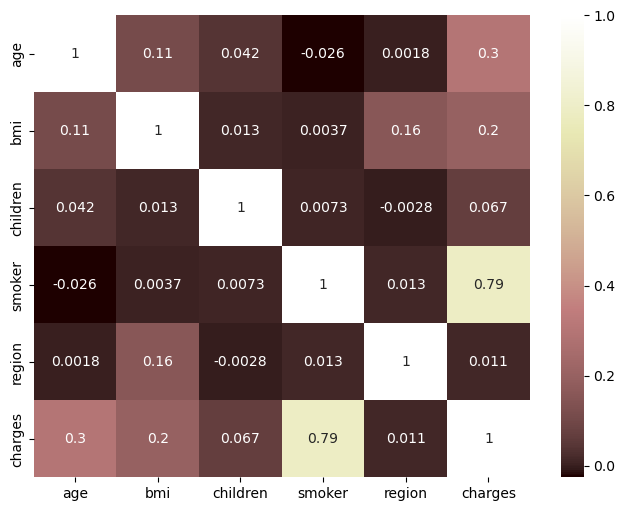

In [247]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='pink',annot=True)
plt.show()

#This is the chart after dropping the sex column. Age is highly correlated with smoker.

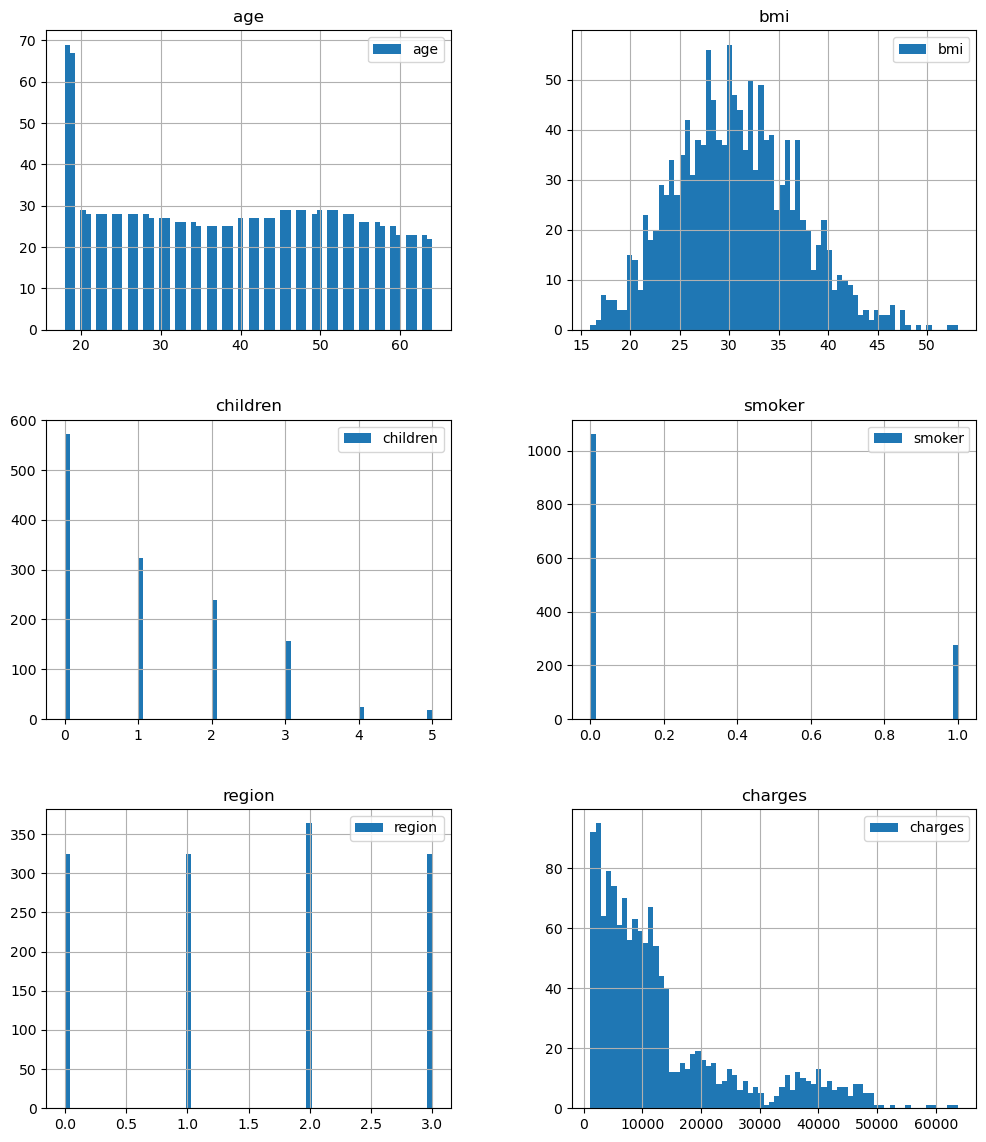

In [248]:
df.hist(bins=70, figsize=(12,14),legend=True)
plt.show()

It can be notice that age and charges have right skewness and rest are normal.

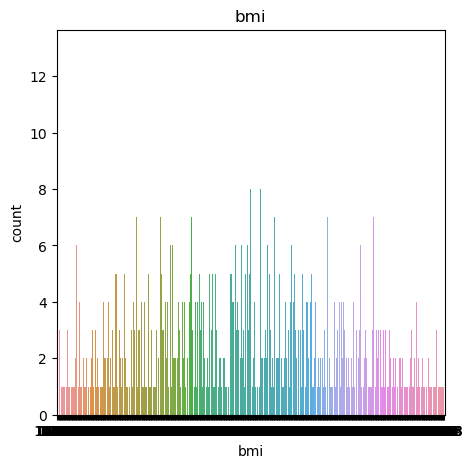

In [249]:
plt.figure(figsize=(5,5))
sns.countplot(x='bmi',data=df)
plt.title('bmi')
plt.show()

This shows the bmi graph but charges can not be descriminate by it.

age            Axes(0.125,0.786098;0.227941x0.0939024)
bmi         Axes(0.398529,0.786098;0.227941x0.0939024)
children    Axes(0.672059,0.786098;0.227941x0.0939024)
smoker         Axes(0.125,0.673415;0.227941x0.0939024)
region      Axes(0.398529,0.673415;0.227941x0.0939024)
charges     Axes(0.672059,0.673415;0.227941x0.0939024)
dtype: object

<Figure size 1500x2000 with 0 Axes>

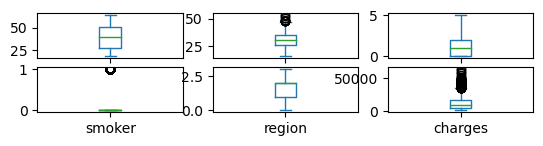

In [250]:
#checking for outliers
fig=plt.figure(figsize=(15,20))
df.plot(kind='box',subplots=True,layout=(7,3))

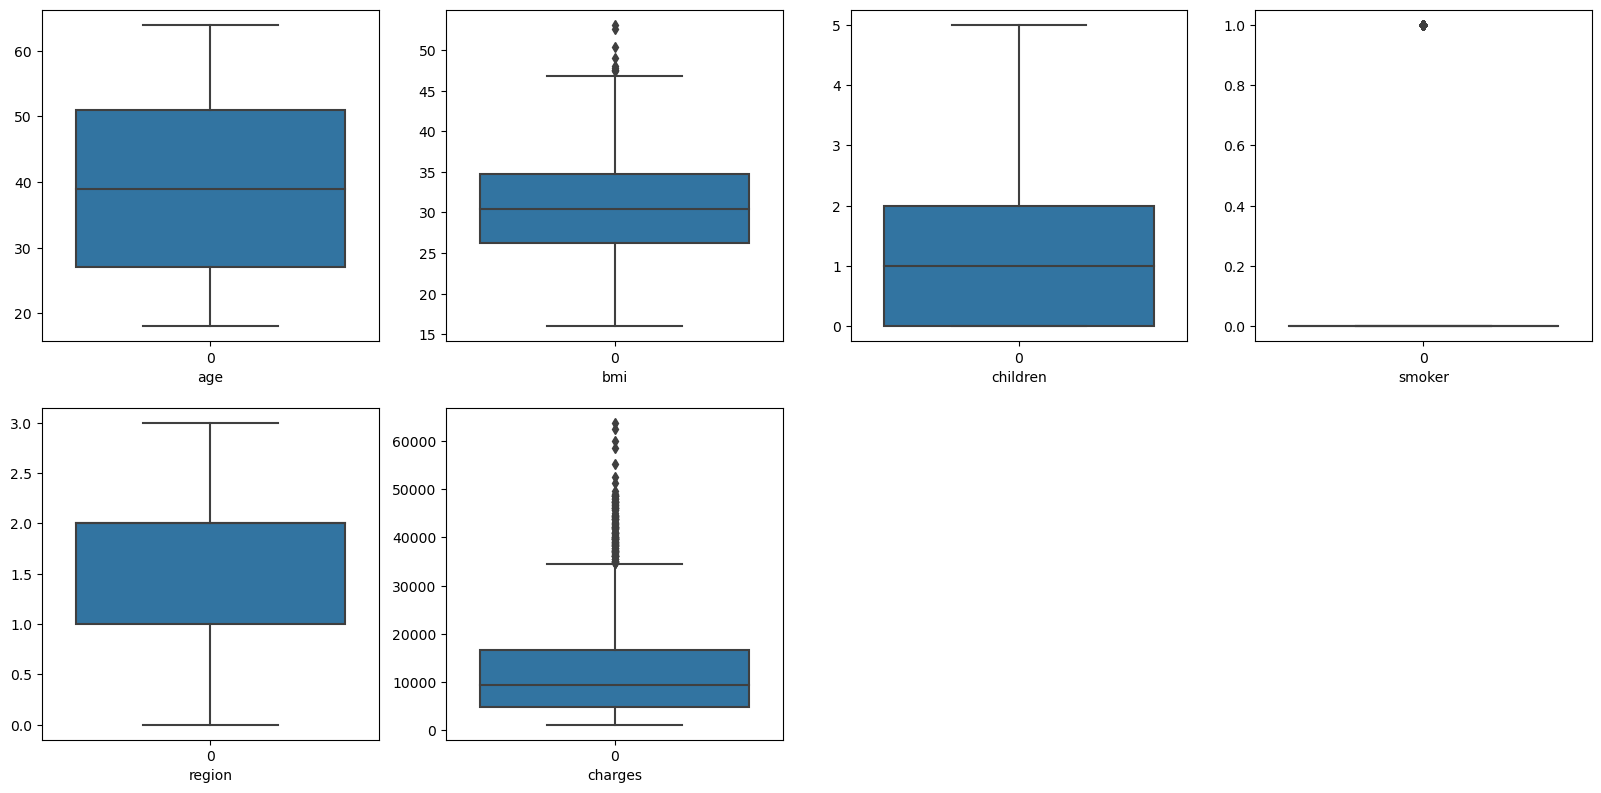

In [251]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i])
        plt.xlabel(i)
        p+=1
plt.show()  

We can see there is outliers present in 'bmi','smoker' and 'charges' column.

In [252]:
#removing outliers
out=df[['bmi','smoker']]
z=np.abs(zscore(out))
z

,bmi,smoker
0,0.453160,1.969660
1,0.509422,0.507702
2,0.383155,0.507702
3,1.305052,0.507702
4,0.292456,0.507702
...,...,...
1333,0.050269,0.507702
1334,0.206053,0.507702
1335,1.014490,0.507702
1336,0.797524,0.507702


In [253]:
np.where(z>3)


(array([ 116,  846, 1046, 1316], dtype=int64),
 array([0, 0, 0, 0], dtype=int64))

In [254]:
df1=df[(z<3).all(axis=1)]
df1.shape

(1333, 6)

In [255]:
#checking skewness
df1.skew()

age         0.052714
bmi         0.205541
children    0.934451
smoker      1.464636
region     -0.035352
charges     1.517177
dtype: float64

In [256]:
#distributing the data
x=df1.iloc[:,0:-1]

In [257]:
y=df1.iloc[:,-1]

In [258]:
x=df1.drop('charges',axis=1)
y=df1['charges']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (1333, 5)
label dimension (1333,)


In [259]:
#scaling of data
st=StandardScaler()
x=st.fit_transform(x)
x

array([[-1.44391729, -0.45019112, -0.9099223 ,  1.97047808,  1.34285101],
       [-1.51522515,  0.52799105, -0.08085434, -0.50749105,  0.4388003 ],
       [-0.80214655,  0.39967754,  1.57728158, -0.50749105,  0.4388003 ],
       ...,
       [-1.51522515,  1.04124506, -0.9099223 , -0.50749105,  0.4388003 ],
       [-1.30130157, -0.80013704, -0.9099223 , -0.50749105,  1.34285101],
       [ 1.55101281, -0.25522125, -0.9099223 ,  1.97047808, -1.3693011 ]])

# Model building

In [260]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso

In [261]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pre=lr.predict(x_test)
    acc=r2_score(y_test,pre)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy',maxAccu,'at random state',maxRs)        
    

Best accuracy 0.7961166203466971 at random state 12


In [262]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [263]:
#Ridge
rd=Ridge()
rd.fit(x_train,y_train)
pre=rd.predict(x_test)
pred=rd.predict(x_train)
print("R2 score:",r2_score(y_train,pred))
print("R2 score training data:",r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

R2 score: 0.7277852579382618
R2 score training data: 79.5994739354543
Mean absolute error: 3782.748869330233
Mean square error: 31489772.94344122
Root mean square error: 5611.574907585323


In [264]:
#support vector regression
svr=SVR()
svr.fit(x_train,y_train)
pre=svr.predict(x_test)
pred=svr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

-0.09872809470025312
-6.696771404021629
Mean absolute error: 8183.212073952402
Mean square error: 164694630.652198
Root mean square error: 12833.340588178824


In [265]:
#Randomforest
ra=RandomForestRegressor()
ra.fit(x_train,y_train)
pre=ra.predict(x_test)
pred=ra.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.9725633989674777
87.77598947489922
Mean absolute error: 2451.8847245084157
Mean square error: 18868695.575583
Root mean square error: 4343.81118093121


In [266]:
#KNN
knn=KNN()
knn.fit(x_train,y_train)
pre=knn.predict(x_test)
pred=knn.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.8617556832736712
86.36035187939967
Mean absolute error: 2766.2178490974998
Mean square error: 21053840.52289654
Root mean square error: 4588.446417132551


In [267]:
#Lasso
las=Lasso()
las.fit(x_train,y_train)
pre=las.predict(x_test)
pred=las.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.7277860656864474
79.60984804277344
Mean absolute error: 3780.9090427354317
Mean square error: 31473759.715010893
Root mean square error: 5610.147922738837


In [268]:
#Extratrees regressor
ex=ExtraTreesRegressor()
ex.fit(x_train,y_train)
pre=ex.predict(x_test)
pred=ex.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.9980333070000582
85.78897031779698
Mean absolute error: 2457.95702489275
Mean square error: 21935811.682954367
Root mean square error: 4683.568263936629


In [269]:
#Linear regression
lr=LinearRegression()
lr.fit(x_train,y_train)
pre=lr.predict(x_test)
pred=lr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.727786102073811
79.6116620346697
Mean absolute error: 3780.8685495240334
Mean square error: 31470959.67971993
Root mean square error: 5609.8983662558385


# Cross Validation

In [270]:
# Cv score for Ridge
score= cross_val_score(rd,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.7632967  0.70842215 0.77461892 0.73202342 0.75686148]
0.7470445339698975
difference between R2score and cross validation 4.907208637679961


In [271]:
# Cv score for support vector
score= cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[-0.10796901 -0.10764763 -0.07114513 -0.10101818 -0.10357919]
-0.09827182762511386
difference between R2score and cross validation 89.43884479718109


In [272]:
# Cv score for Random forest
score= cross_val_score(ra,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.8497119  0.77070295 0.86987625 0.83344895 0.85368661]
0.8354853324177924
difference between R2score and cross validation -3.936871207109538


In [273]:
# Cv score for KNN
score= cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.83171249 0.78342281 0.85064824 0.82708839 0.82286562]
0.8231475102026898
difference between R2score and cross validation -2.703088985599278


In [274]:
# Cv score for lasso
score= cross_val_score(las,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.76329336 0.70835236 0.77470063 0.73196589 0.75689389]
0.7470412248281029
difference between R2score and cross validation 4.9075395518594185


In [275]:
# Cv score for Extatrees regressor
score= cross_val_score(ex,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.82626542 0.73346147 0.86741836 0.83345966 0.82750733]
0.8176224487029978
difference between R2score and cross validation -2.150582835630077


In [276]:
# Cv score for Linear regression
score= cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.76329455 0.70832195 0.77472269 0.73196575 0.75689367]
0.7470397236693899
difference between R2score and cross validation 4.907689667730719


ExtraTrees regressor is our best model as the difference between R2 score and cross validation score is least

# Setting Paramaters

In [277]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [278]:
para={'n_estimators':[50,80,100],
      'criterion':['squared_error','poisson','absolute_error'],
     'n_jobs':['int',None],
     'ccp_alpha':[0.0]}
ex_cv=GridSearchCV(ex,para,cv=5)
ex_cv.fit(x_train,y_train)
print(ex_cv.best_params_)

{'ccp_alpha': 0.0, 'criterion': 'poisson', 'n_estimators': 50, 'n_jobs': None}


In [279]:
ex_new=ExtraTreesRegressor(criterion='poisson',ccp_alpha=0.0,n_jobs=None,n_estimators=100)
ex_new.fit(x_train,y_train)
y_pred_new=ex_new.predict(x_test)
print(metrics.r2_score(y_test,y_pred_new))

0.8566261986860378


In [280]:
ex_new.fit(x_train,y_train)
pre=ex_new.predict(x_test)
print('R2 score:',r2_score(y_test,pre))
print('mean absolute error:',mean_absolute_error(y_test,pre))
print('mean square error;',mean_squared_error(y_test,pre))
print('root mean squre error:',np.sqrt(mean_squared_error(y_test,pre)))

R2 score: 0.8578012036929337
mean absolute error: 2437.4503536161246
mean square error; 21949472.255630694
root mean squre error: 4685.026387933231


In [281]:
import joblib
import pickle
filename="Medical insurance.pkl"
pickle.dump(ex_new,open(filename,'wb'))

In [282]:
load_m=pickle.load(open('Medical insurance.pkl','rb'))

In [283]:
result=load_m.score(x_test,y_test)
print(result*100)

85.78012036929337


In [284]:
con=pd.DataFrame([load_m.predict(x_test)[:],y_test[:]],index=['predicted','orginal'])
con

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
predicted,7299.60186,8807.055045,13868.99202,5727.559848,1802.626102,5189.975804,4608.671425,16430.261028,3466.721054,13471.525597,...,48324.536593,5158.979404,3742.154086,4381.166216,4326.109787,1743.4924,5683.921106,10065.984644,4184.35641,11812.865925
orginal,5708.86700,8310.839150,27322.73386,2866.091000,1146.796600,5267.818150,4032.240700,16115.304500,12609.887020,13429.035400,...,48673.558800,4670.640000,2755.020950,4243.590050,4349.462000,1256.2990,6128.797450,8442.667000,2842.76075,11363.283200
